# DGEMM on JUWELS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
sns.set(
    palette=sns.color_palette("Paired"),
    rc={
        "figure.figsize": (24, 10)
    },
    color_codes=False
)
from scipy.stats import linregress
SYSTEM="juwels"
DATADIR="../../data/"+SYSTEM+"/"
plt.rcParams['figure.figsize'] = [24, 10]  # Bug; needed to be set twice

In [2]:
plt.rcParams['figure.figsize'] = [24, 10]  # Bug; needed to be set twice

In [3]:
frequency = 2.7
turbofrequency = 2.7  # running with --disable-turbomode
sockets = 2
corespersocket = 24
flopspercycle = 32

singlecorepeak = 1 * turbofrequency * flopspercycle
theoreticalpeak= sockets * corespersocket * frequency * flopspercycle

def theoricalPeak(core):
    # Turbo Bost on one core
    if core == 1:
        return singlecorepeak
    else:
        return core * frequency * flopspercycle

# 2021-02-18

In [4]:
INPUT_FILE="2021-02-18.csv"
df = pd.read_csv(DATADIR+INPUT_FILE)
df

,jobid,systemname,numlib,error_code,runtime[s],nodes,taskspernode,threadspertask,NLAST,time[s],GFLOPS,GFLOPSpcore
0,3397943,juwels,BLIS/0.8,0,13.0,1,1,1,2048,0.25241,68.0636,68.0636
1,3397947,juwels,BLIS/0.8,0,299.0,1,1,24,8192,0.85390,1287.6379,53.6516
2,3397958,juwels,BLIS/0.8,0,263.0,1,1,48,8192,0.53560,2052.8663,42.7680
3,3397974,juwels,OpenBLAS/0.3.12,0,11.0,1,1,1,2048,0.22634,75.9014,75.9014
4,3397983,juwels,OpenBLAS/0.3.12,0,286.0,1,1,24,8192,0.77184,1424.5328,59.3555
5,3397988,juwels,OpenBLAS/0.3.12,0,264.0,1,1,48,8192,0.66744,1647.3451,34.3197
6,3397962,juwels,imkl/2020.4.304,0,12.0,1,1,1,2048,0.24022,71.5173,71.5173
7,3397966,juwels,imkl/2020.4.304,0,273.0,1,1,24,8192,0.75596,1454.4589,60.6025
8,3397970,juwels,imkl/2020.4.304,0,251.0,1,1,48,8192,0.45215,2431.7202,50.6608


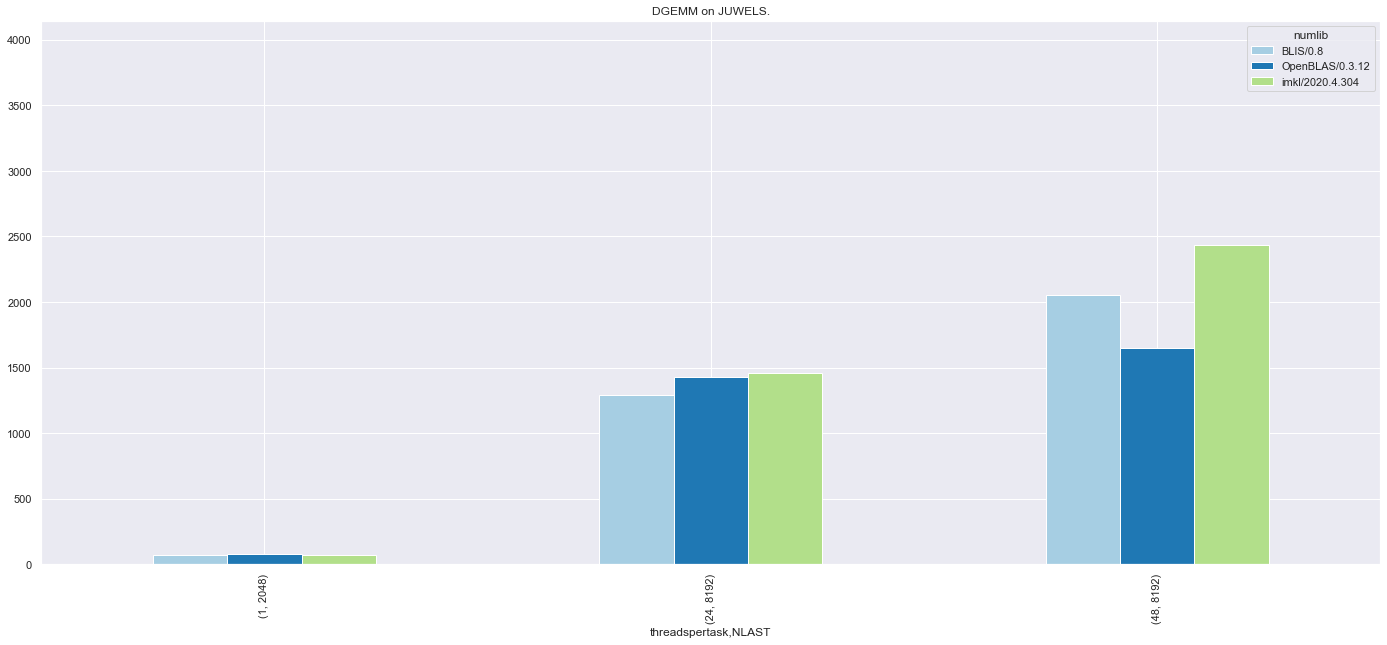

In [5]:
df.pivot_table(columns=["numlib"], index=["threadspertask","NLAST"], values="GFLOPS").plot(kind="bar", width=0.5, logy=False, title="DGEMM on JUWELS.",ylim=(0,theoreticalpeak));

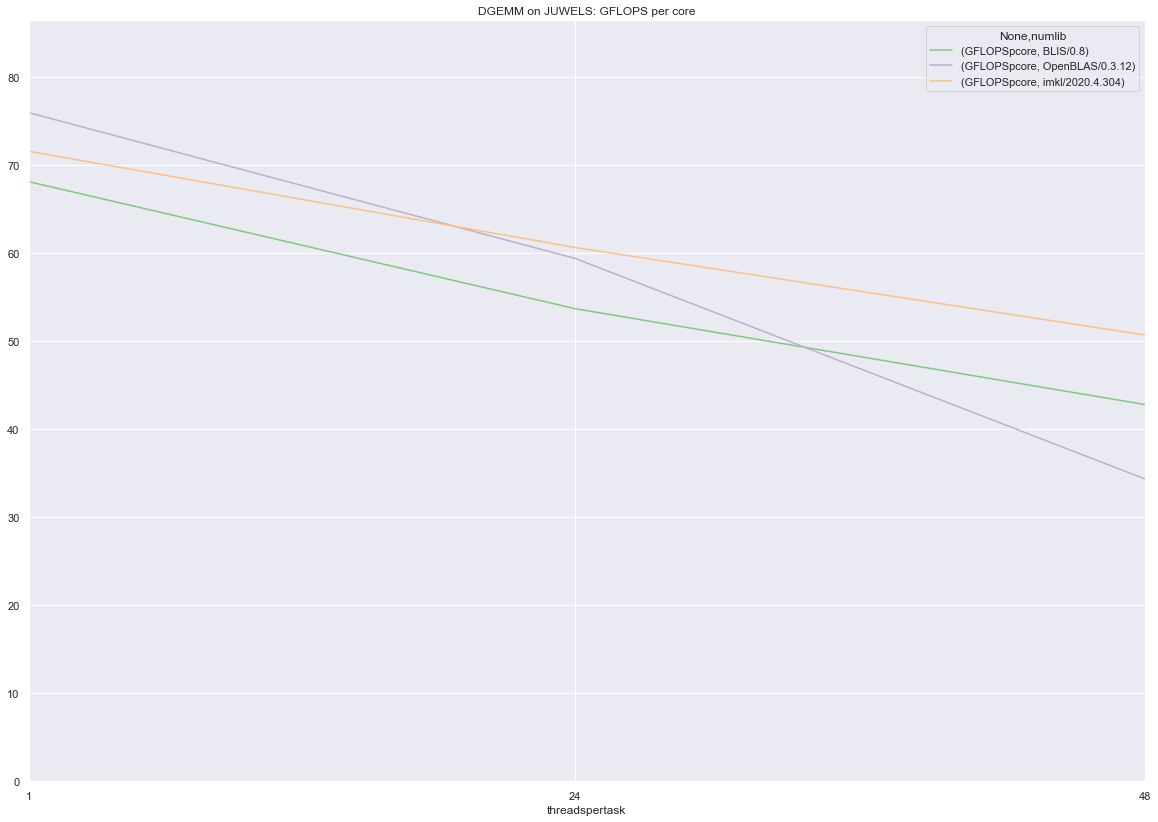

In [6]:
%matplotlib inline
sns.set(palette=sns.color_palette("Accent"))
plt.rcParams['figure.figsize'] = [20, 14]
table=df.pivot_table(columns=["numlib"],index=["threadspertask"], values=["GFLOPSpcore"])
plot=table.plot(kind="line", logy=False, title="DGEMM on JUWELS: GFLOPS per core");
plot.set_ylim(0,singlecorepeak)
plot.set_xticks([1,24,48])

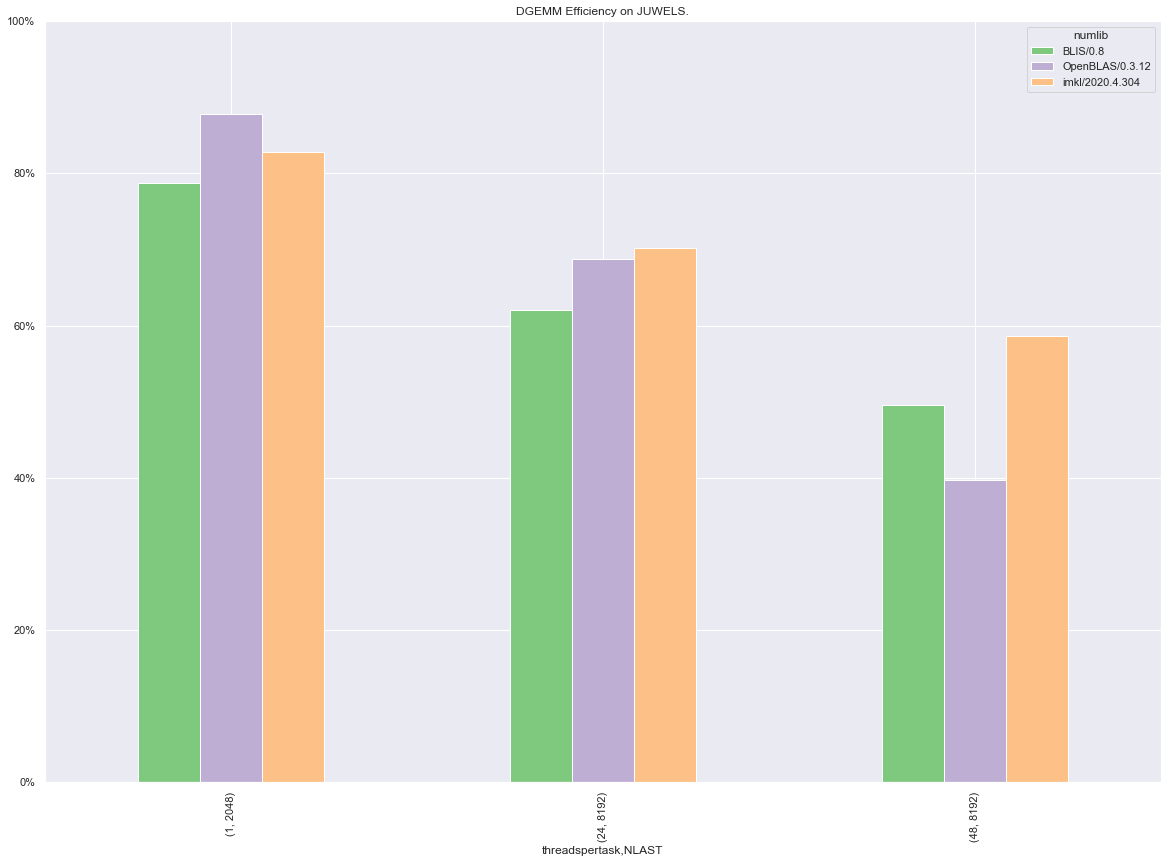

In [7]:
df['theoricalPeak'] = [theoricalPeak(int(x)) for x in df[['threadspertask']].values]
df['Efficiency'] = df.GFLOPS / df.theoricalPeak * 100

ax = df.pivot_table(columns=["numlib"], index=["threadspertask","NLAST"], values="Efficiency").plot(kind="bar", width=0.5, logy=False, title="DGEMM Efficiency on JUWELS.",ylim=(0,100));
ax.yaxis.set_major_formatter(mtick.PercentFormatter())